In [1]:
import numpy as np
import pandas as pd
import fbprophet as fb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('minTemp.csv',delimiter=',')

In [3]:
data.drop('Unnamed: 2',axis=1,inplace = True)

In [4]:
data.drop(3650,axis=0,inplace = True)

In [5]:
data.drop(3651,axis=0,inplace = True)

In [6]:
data['Date'].unique()

array(['01-01-1981', '02-01-1981', '03-01-1981', ..., '29-12-1990',
       '30-12-1990', '31-12-1990'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 85.5+ KB


In [8]:
data.head()

Date  Temp
0  01-01-1981  20.7
1  02-01-1981  17.9
2  03-01-1981  18.8
3  04-01-1981  14.6
4  05-01-1981  15.8

In [9]:
print(data[data['Temp']=='?0.2'].index.values)
#data['Temp'].astype(float)

[565]


In [10]:
data['Temp'].replace('?','',inplace=True)

In [11]:
print(data[data['Temp']=='?0.2'].index.values)

[565]


In [12]:
data['Temp'].loc[565]  = 0.2

In [13]:
print(data[data['Temp']=='?0.2'].index.values)

[]


In [14]:
data.iloc[565]

Date    20-07-1982
Temp           0.2
Name: 565, dtype: object

In [20]:
print(data[data['Temp']=='?0.1'].index.values)

[1290]


In [22]:
data['Temp'].astype(float)

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, Length: 3650, dtype: float64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3650 non-null   object
 1   Temp    3650 non-null   object
dtypes: object(2)
memory usage: 245.5+ KB


In [35]:
data['Temp'] = pd.to_numeric(data['Temp'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3650 non-null   datetime64[ns]
 1   y       3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 245.5 KB


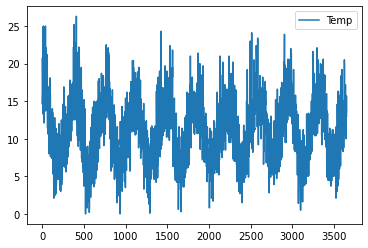

In [37]:
data.plot()

In [38]:
data.columns = ['ds','y']

In [39]:
data

ds     y
0     01-01-1981  20.7
1     02-01-1981  17.9
2     03-01-1981  18.8
3     04-01-1981  14.6
4     05-01-1981  15.8
...          ...   ...
3645  27-12-1990  14.0
3646  28-12-1990  13.6
3647  29-12-1990  13.5
3648  30-12-1990  15.7
3649  31-12-1990  13.0

[3650 rows x 2 columns]

In [41]:
data['ds'] = pd.to_datetime(data['ds'])

In [43]:
from fbprophet import Prophet
model = Prophet()
model.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [44]:
future_dates = model.make_future_dataframe(periods = 365)

In [45]:
future_dates

ds
0    1981-01-01
1    1981-01-02
2    1981-01-03
3    1981-01-04
4    1981-01-05
...         ...
4010 1991-12-27
4011 1991-12-28
4012 1991-12-29
4013 1991-12-30
4014 1991-12-31

[4015 rows x 1 columns]

In [46]:
prediction = model.predict(future_dates)

In [47]:
prediction

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    1981-01-01  11.536797    9.092465   18.630830    11.536797    11.536797   
1    1981-01-02  11.535736    9.105346   18.586946    11.535736    11.535736   
2    1981-01-03  11.534675    9.643470   18.407707    11.534675    11.534675   
3    1981-01-04  11.533613    9.599045   18.995690    11.533613    11.533613   
4    1981-01-05  11.532552    9.578938   18.936709    11.532552    11.532552   
...         ...        ...         ...         ...          ...          ...   
4010 1991-12-27  11.945008    9.361400   18.606475    11.912966    11.976288   
4011 1991-12-28  11.945493    9.152903   18.537151    11.913312    11.976857   
4012 1991-12-29  11.945977    9.475852   18.655318    11.913613    11.977426   
4013 1991-12-30  11.946462    9.493625   18.497799    11.913947    11.977986   
4014 1991-12-31  11.946946    9.572258   19.091095    11.914292    11.978535   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0           2.326347              2.326347              2.326347 -0.049757   
1           2.423330              2.423330              2.423330 -0.013091   
2           2.502196              2.502196              2.502196  0.013977   
3           2.492366              2.492366              2.492366 -0.038361   
4           2.479176              2.479176              2.479176 -0.084256   
...              ...                   ...                   ...       ...   
4010        1.911640              1.911640              1.911640 -0.013091   
4011        2.023389              2.023389              2.023389  0.013977   
4012        2.055085              2.055085              2.055085 -0.038361   
4013        2.090971              2.090971              2.090971 -0.084256   
4014        2.290667              2.290667              2.290667  0.037473   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
0        -0.049757     -0.049757  2.376104      2.376104      2.376104   
1        -0.013091     -0.013091  2.436421      2.436421      2.436421   
2         0.013977      0.013977  2.488219      2.488219      2.488219   
3        -0.038361     -0.038361  2.530727      2.530727      2.530727   
4        -0.084256     -0.084256  2.563432      2.563432      2.563432   
...            ...           ...       ...           ...           ...   
4010     -0.013091     -0.013091  1.924731      1.924731      1.924731   
4011      0.013977      0.013977  2.009411      2.009411      2.009411   
4012     -0.038361     -0.038361  2.093446      2.093446      2.093446   
4013     -0.084256     -0.084256  2.175227      2.175227      2.175227   
4014      0.037473      0.037473  2.253194      2.253194      2.253194   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
4010                   0.0                         0.0   
4011                   0.0                         0.0   
4012                   0.0                         0.0   
4013                   0.0                         0.0   
4014                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0  13.863144  
1                            0.0  13.959066  
2                            0.0  14.036871  
3                            0.0  14.025979  
4                            0.0  14.011729  
...                          ...        ...  
4010                         0.0  13.856648  
4011                         0.0  13.968881  
4012                         0.0  14.001062  
4013                         0.0  14.037433  
4014                   

In [48]:
prediction[['ds','yhat','yhat_lower','yhat_upper']]

ds       yhat  yhat_lower  yhat_upper
0    1981-01-01  13.863144    9.092465   18.630830
1    1981-01-02  13.959066    9.105346   18.586946
2    1981-01-03  14.036871    9.643470   18.407707
3    1981-01-04  14.025979    9.599045   18.995690
4    1981-01-05  14.011729    9.578938   18.936709
...         ...        ...         ...         ...
4010 1991-12-27  13.856648    9.361400   18.606475
4011 1991-12-28  13.968881    9.152903   18.537151
4012 1991-12-29  14.001062    9.475852   18.655318
4013 1991-12-30  14.037433    9.493625   18.497799
4014 1991-12-31  14.237613    9.572258   19.091095

[4015 rows x 4 columns]

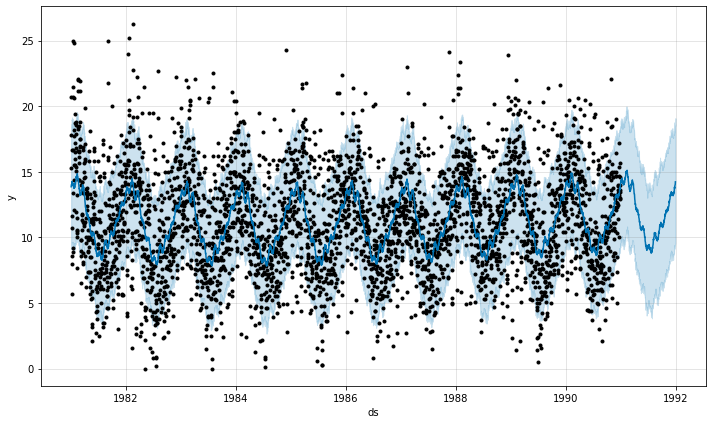

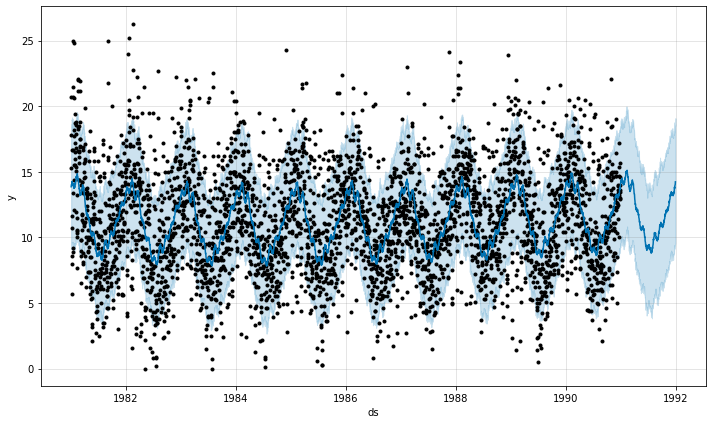

In [49]:
model.plot(prediction)

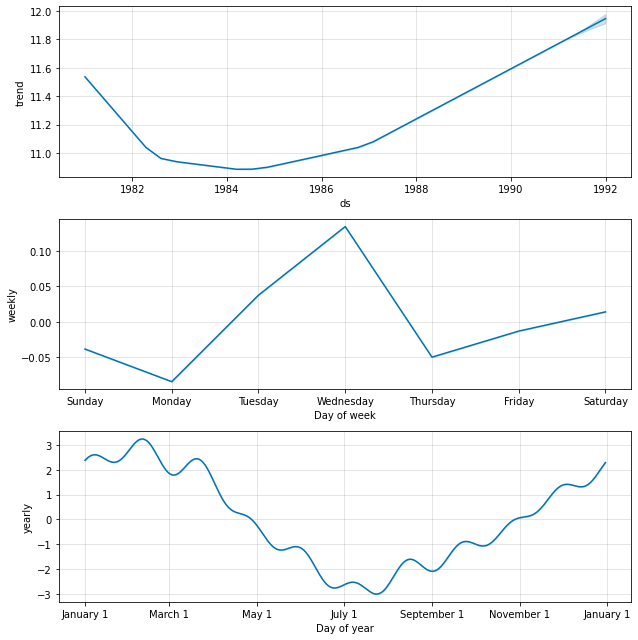

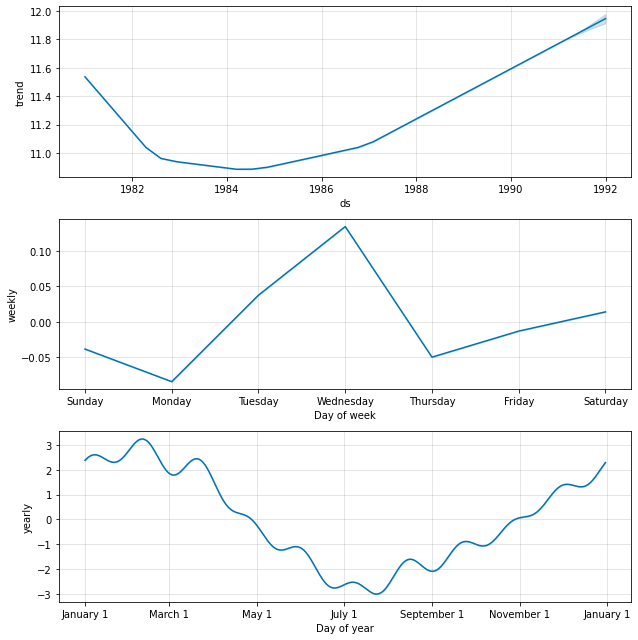

In [50]:
model.plot_components(prediction)

In [51]:
from fbprophet.diagnostics import cross_validation

In [52]:
df_cv = cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 13 forecasts with cutoffs between 1984-02-01 00:00:00 and 1989-12-31 00:00:00


In [53]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper     y     cutoff
0 1984-02-02  14.326033    9.105088   19.285134  11.1 1984-02-01
1 1984-02-03  14.649809    9.825463   19.703706   8.8 1984-02-01
2 1984-02-04  14.835900   10.433331   19.438022  10.3 1984-02-01
3 1984-02-05  14.750155   10.066593   19.920597  14.7 1984-02-01
4 1984-02-06  14.978820   10.410069   20.066333  10.8 1984-02-01

In [54]:
from fbprophet.diagnostics import performance_metrics
df_metrics = performance_metrics(df_cv)
df_metrics

horizon        mse      rmse       mae      mape     mdape  coverage
0    37 days  14.029924  3.745654  2.818440  0.398568  0.183367  0.819701
1    38 days  13.849752  3.721526  2.816106  0.391971  0.187548  0.821162
2    39 days  13.506944  3.675179  2.776557  0.384085  0.178816  0.826355
3    40 days  13.299555  3.646855  2.755904  0.381139  0.177859  0.828302
4    41 days  13.436437  3.665575  2.772854  0.383761  0.177859  0.826031
..       ...        ...       ...       ...       ...       ...       ...
324 361 days  12.945601  3.598000  2.713806  0.523502  0.180144  0.820188
325 362 days  13.381447  3.658066  2.757588  0.533950  0.181137  0.814671
326 363 days  13.743281  3.707193  2.800853  0.541350  0.182052  0.814346
327 364 days  13.822953  3.717923  2.809400  0.531260  0.181137  0.812561
328 365 days  13.679924  3.698638  2.790793  0.514202  0.182269  0.813372

[329 rows x 7 columns]

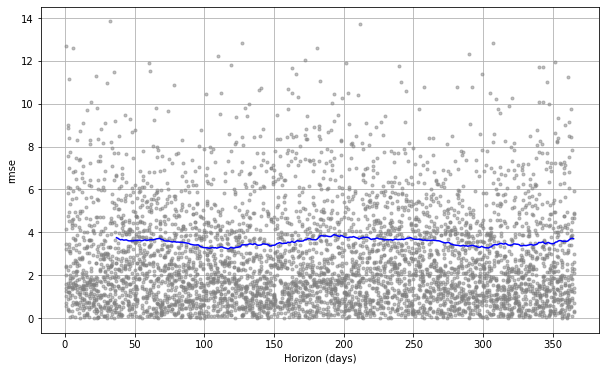

In [55]:
from fbprophet.plot import plot_cross_validation_metric
metrics = plot_cross_validation_metric(df_cv,metric='rmse')